graph-tool チートシート（可視化編）「 url:https://qiita.com/yohm/items/1e3bd4f964d2ddfdf611 」を参照

In [1]:
import graph_tool.all as gt
import numpy as np
import matplotlib.pyplot as plt

サンプルデータを呼び出す

In [2]:
g = gt.collection.data['adjnoun']

グラフを描画してみる

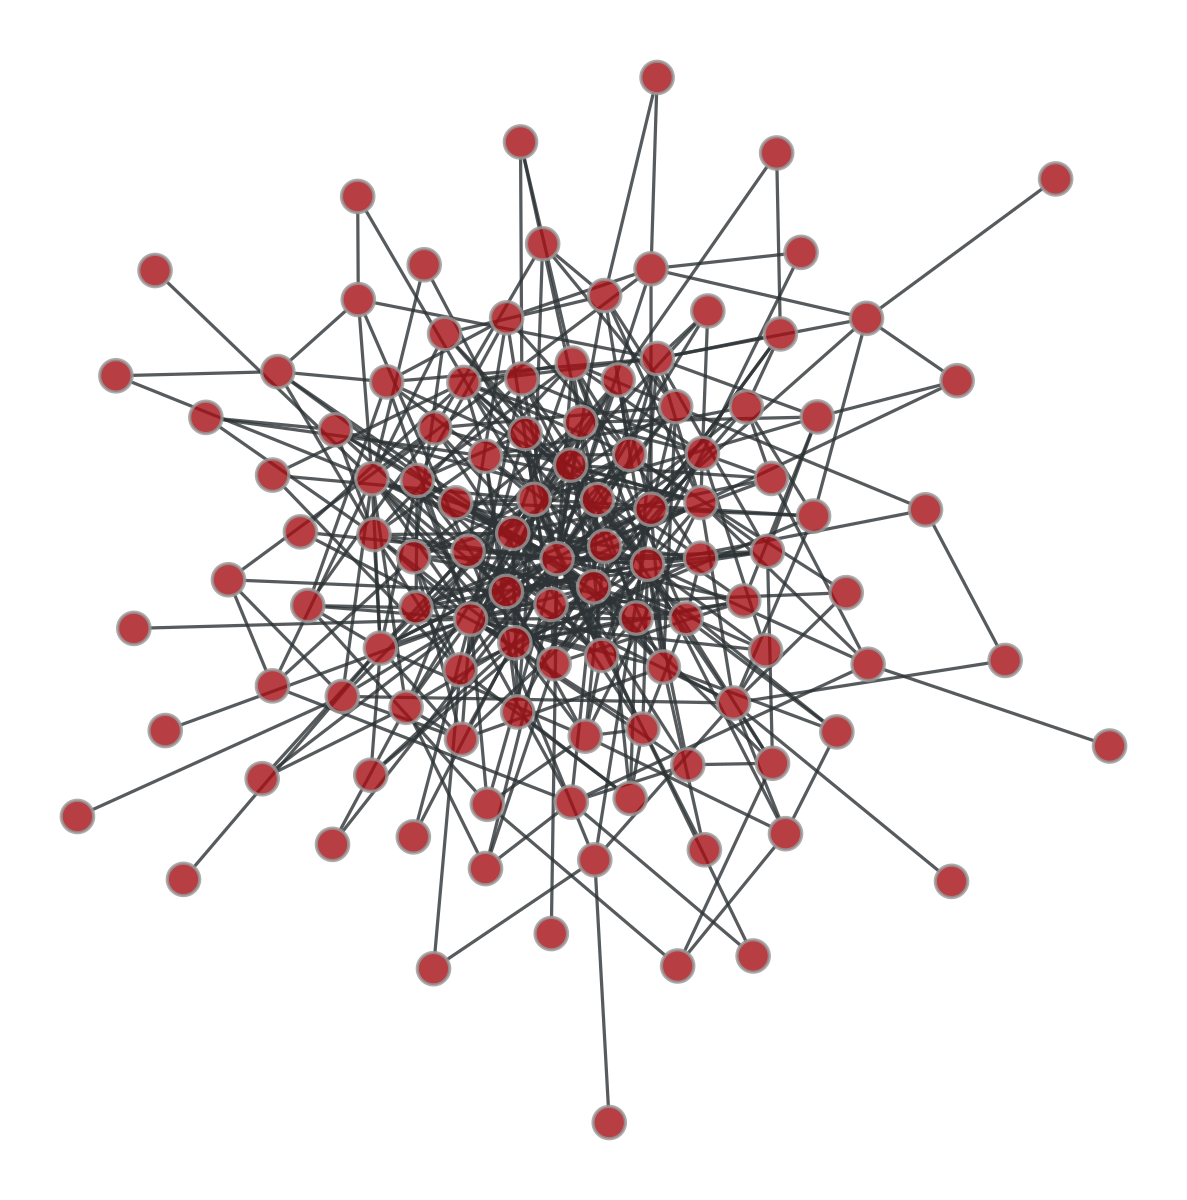

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e34a06190>

In [3]:
gt.graph_draw( g )

ファイル出力する

In [4]:
gt.graph_draw(g, output = 'graph.pdf')

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e31d69910>

pngなどのラスタ形式の画像で画像の大きさを変更できる

In [5]:
gt.graph_draw(g, output = 'graph.png', output_size=(1000,1000))

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0eb4ae4210>

ノードにラベルを表示する

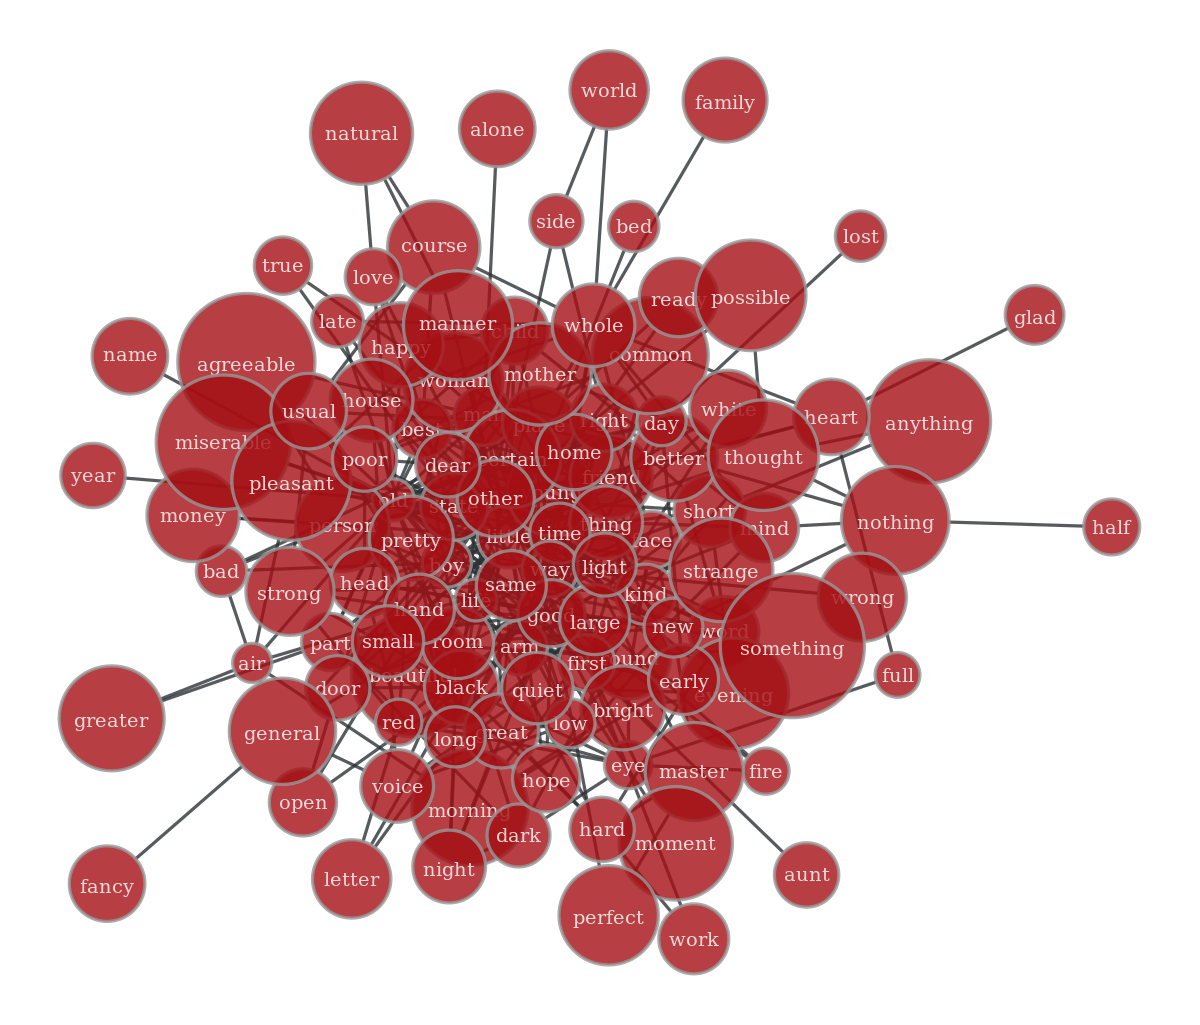

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e31d6a890>

In [6]:
gt.graph_draw(g, vertex_text = g.vp.label)

ノードの外側にラベルを表示することもできる

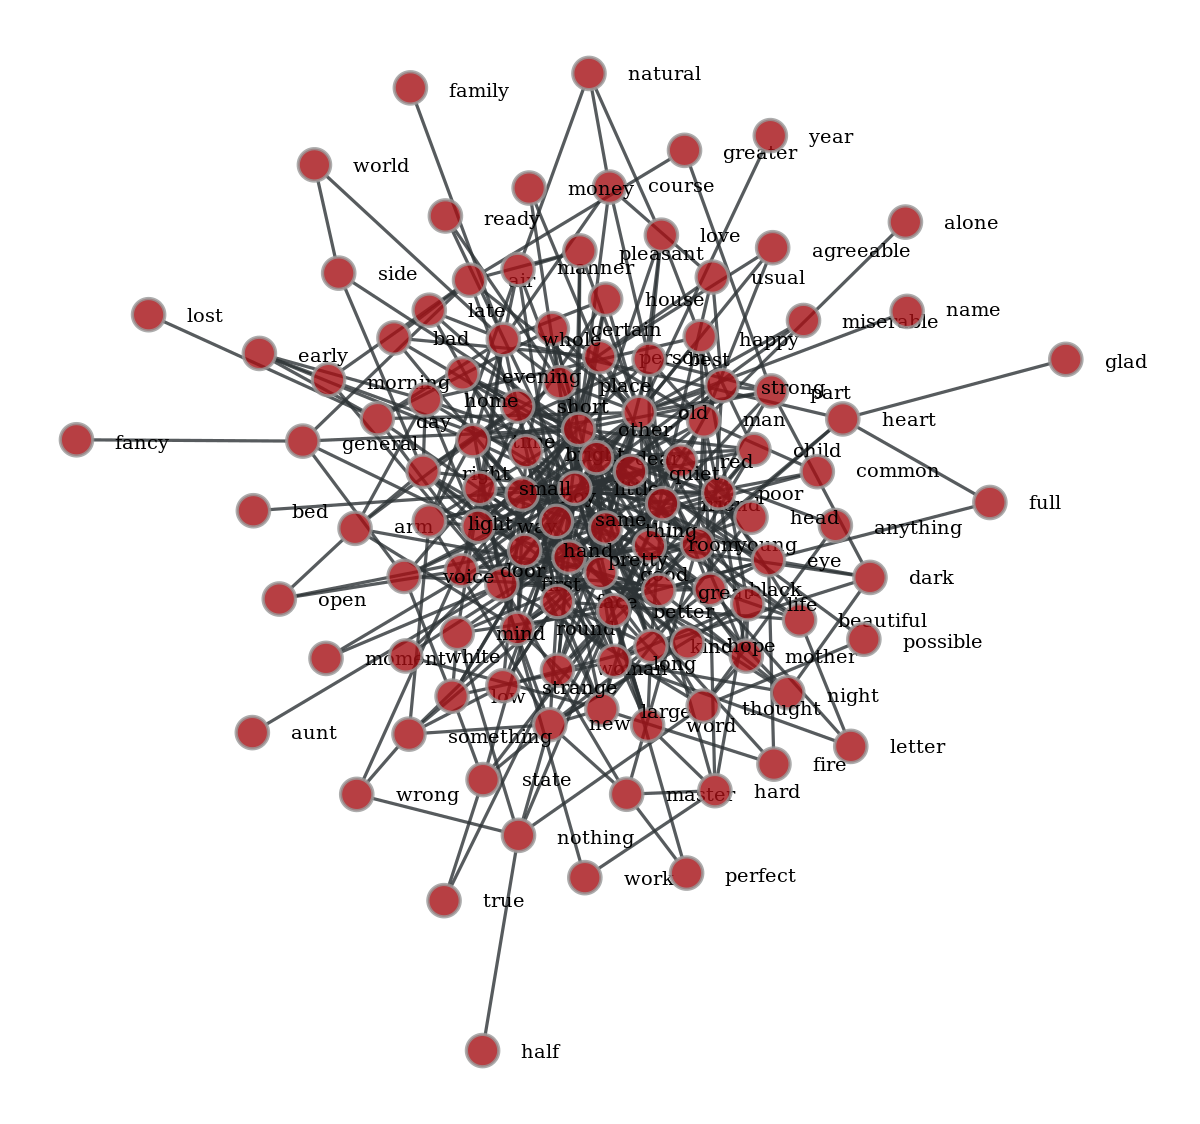

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e31d6be90>

In [7]:
gt.graph_draw(g, vertex_text = g.vp.label, vertex_text_position = 0)

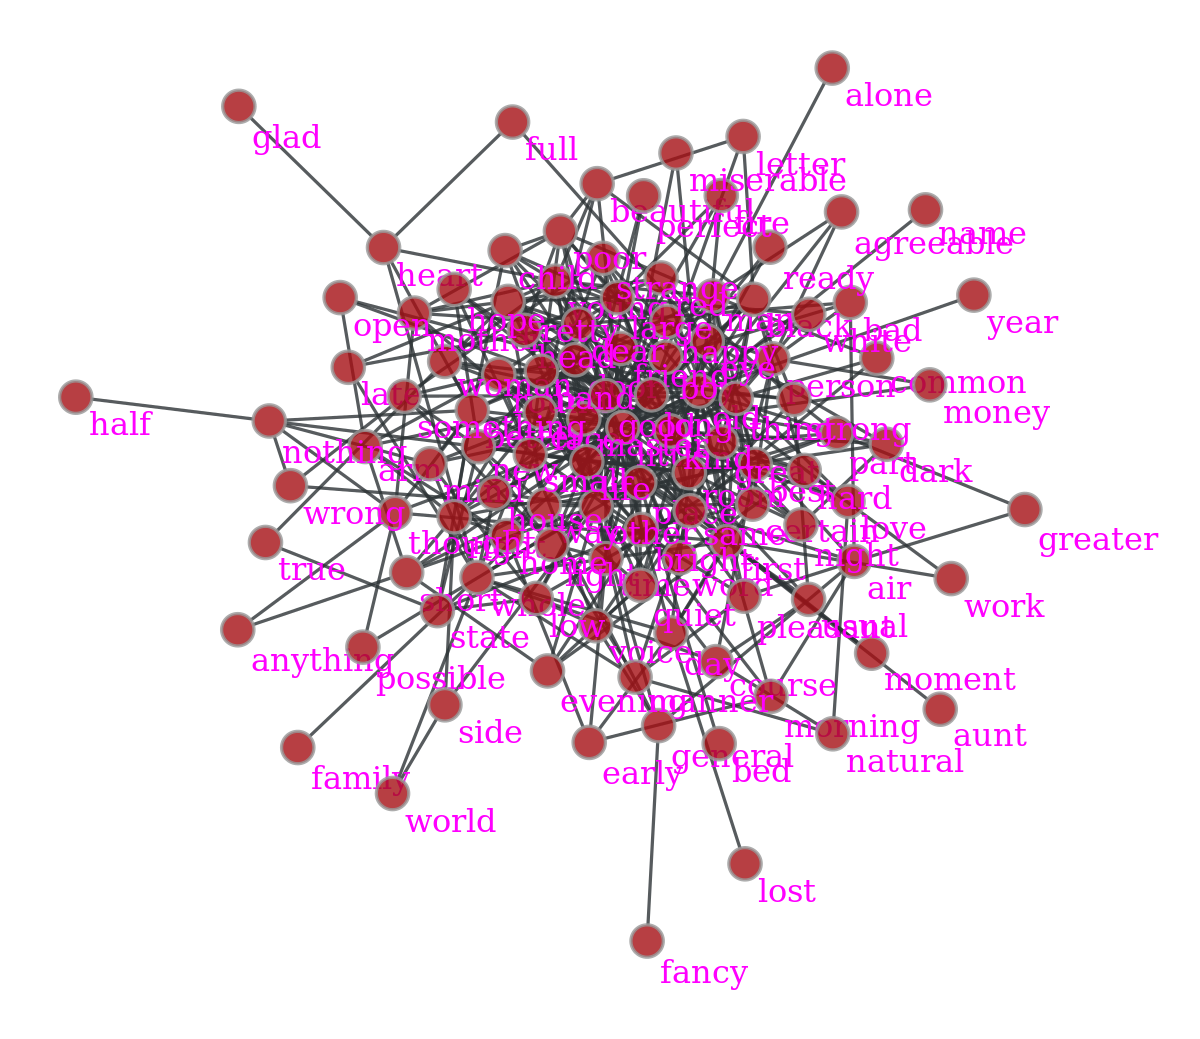

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e31d71810>

In [8]:
gt.graph_draw(g, vertex_text = g.vp.label, vertex_text_position = 0, vertex_font_size = 16, vertex_text_offset = [-1,1], vertex_text_color=(255,0,255,255))

レイアウトの変更を行う

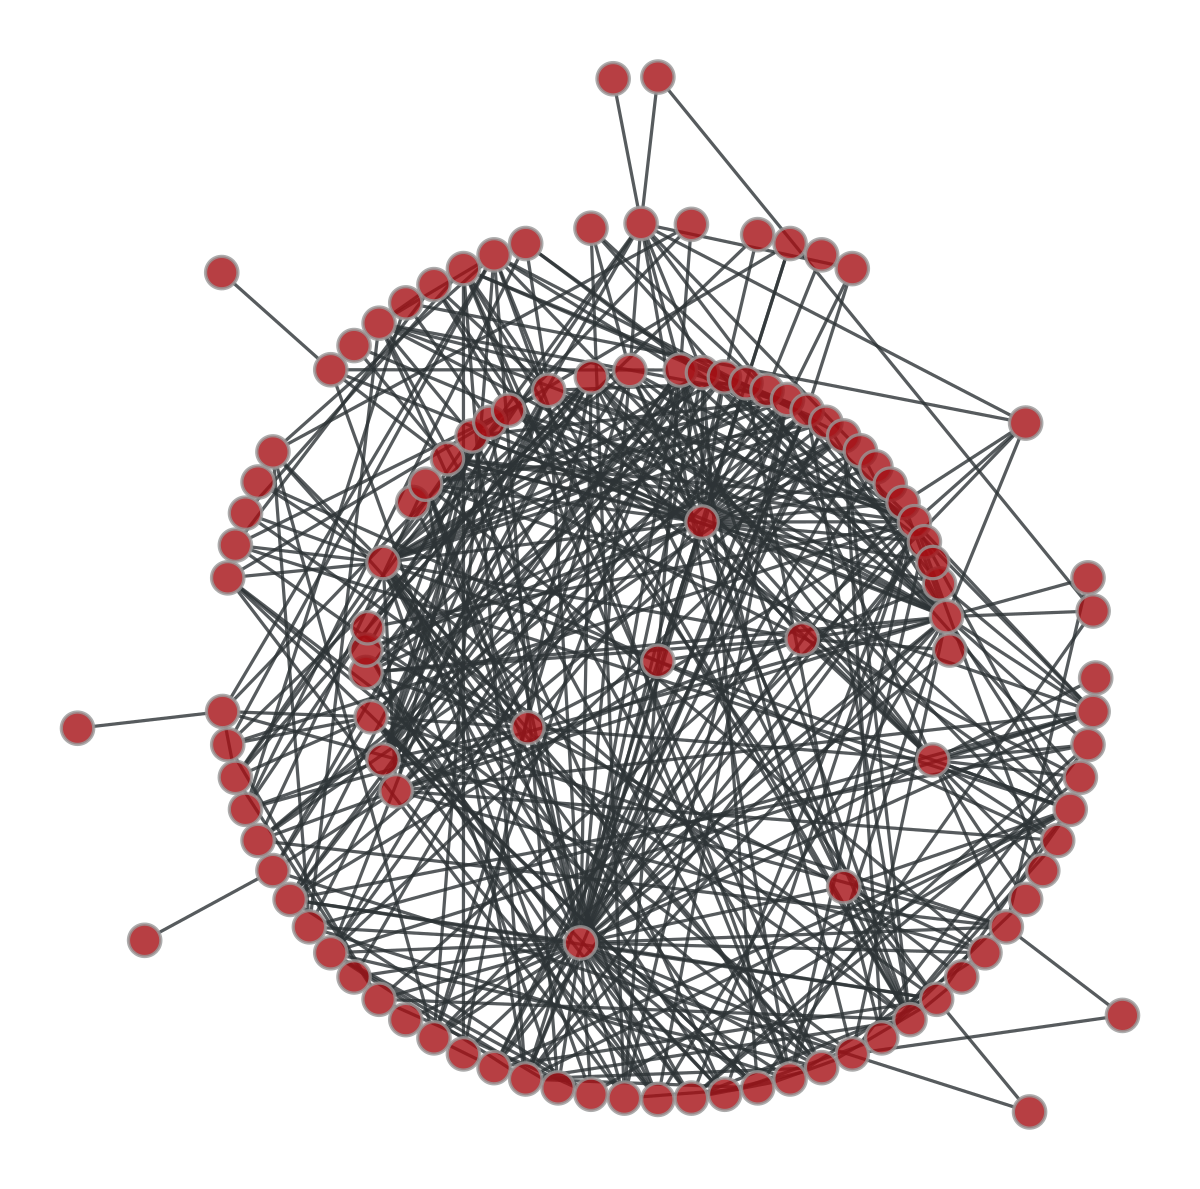

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e320fb650>

In [9]:
pos = gt.radial_tree_layout(g, 0)
gt.graph_draw(g, pos = pos)

ノードやエッジの見た目を次数などの統計量に応じて変更する

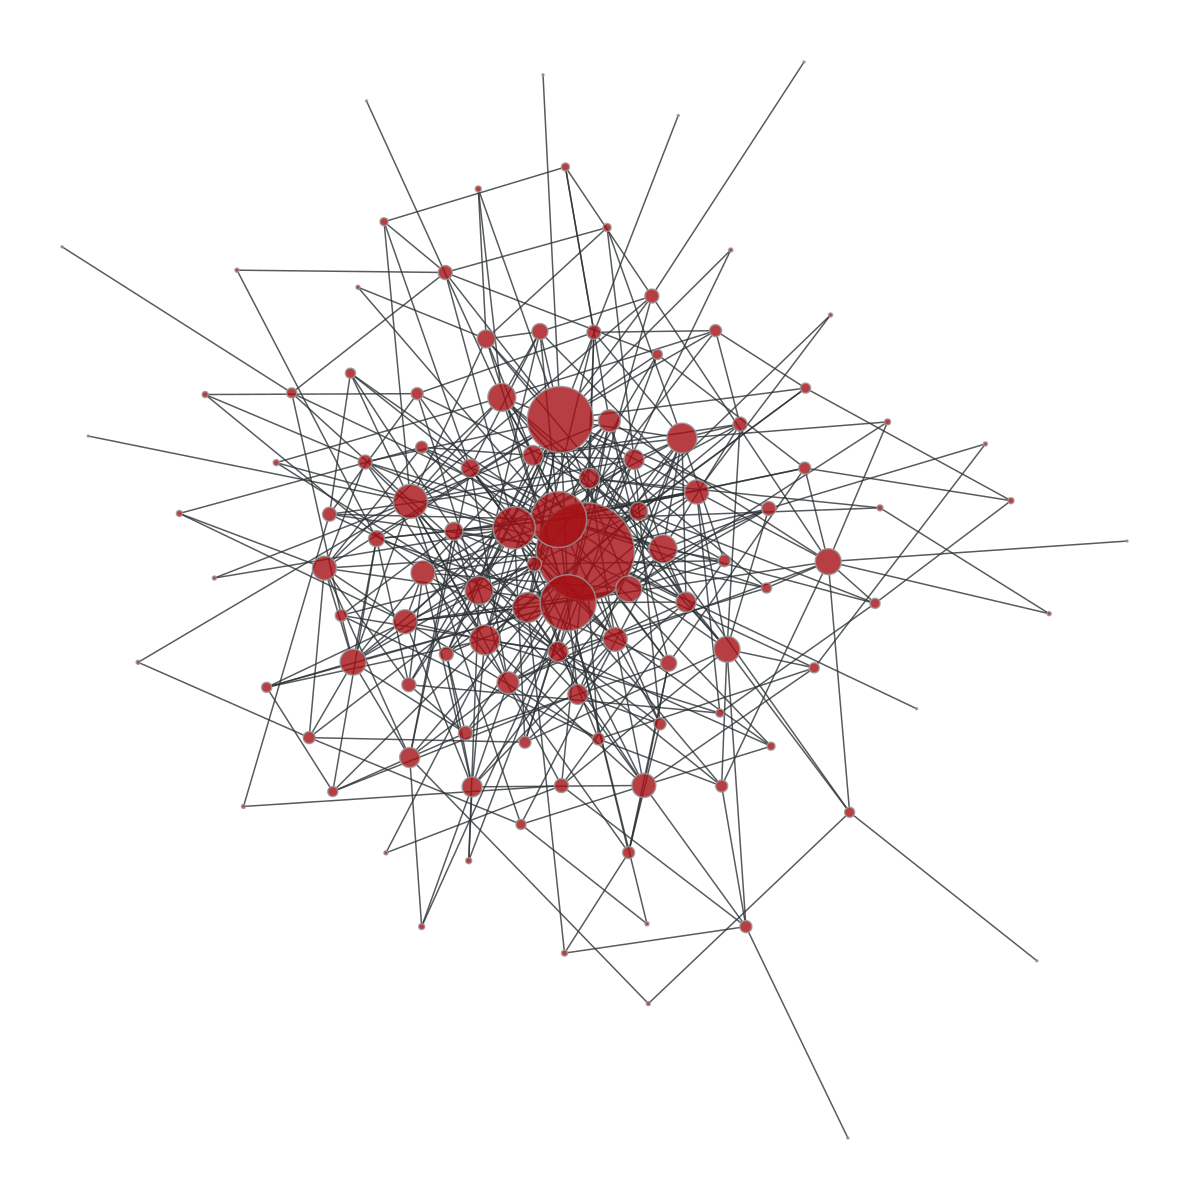

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e31d78110>

In [10]:
deg = g.degree_property_map("total")
gt.graph_draw(g, vertex_size = deg)

スケールをうまく調整するメソッド「gt.prop_to_size」もある

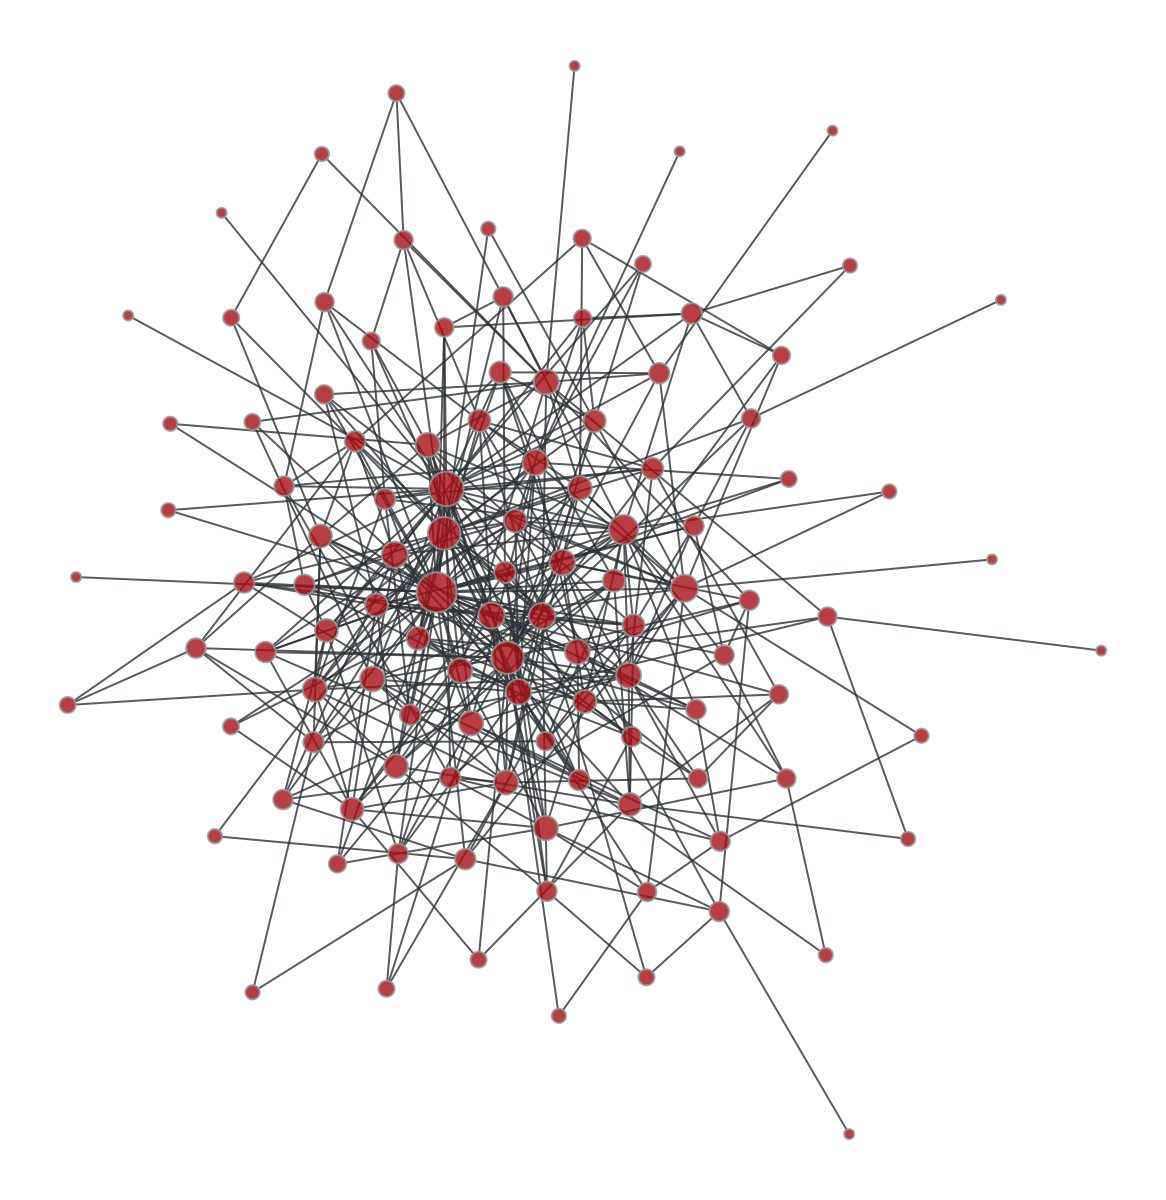

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e31d78290>

In [11]:
gt.graph_draw(g, vertex_size = gt.prop_to_size(deg,mi=5,ma=20,log=False) )

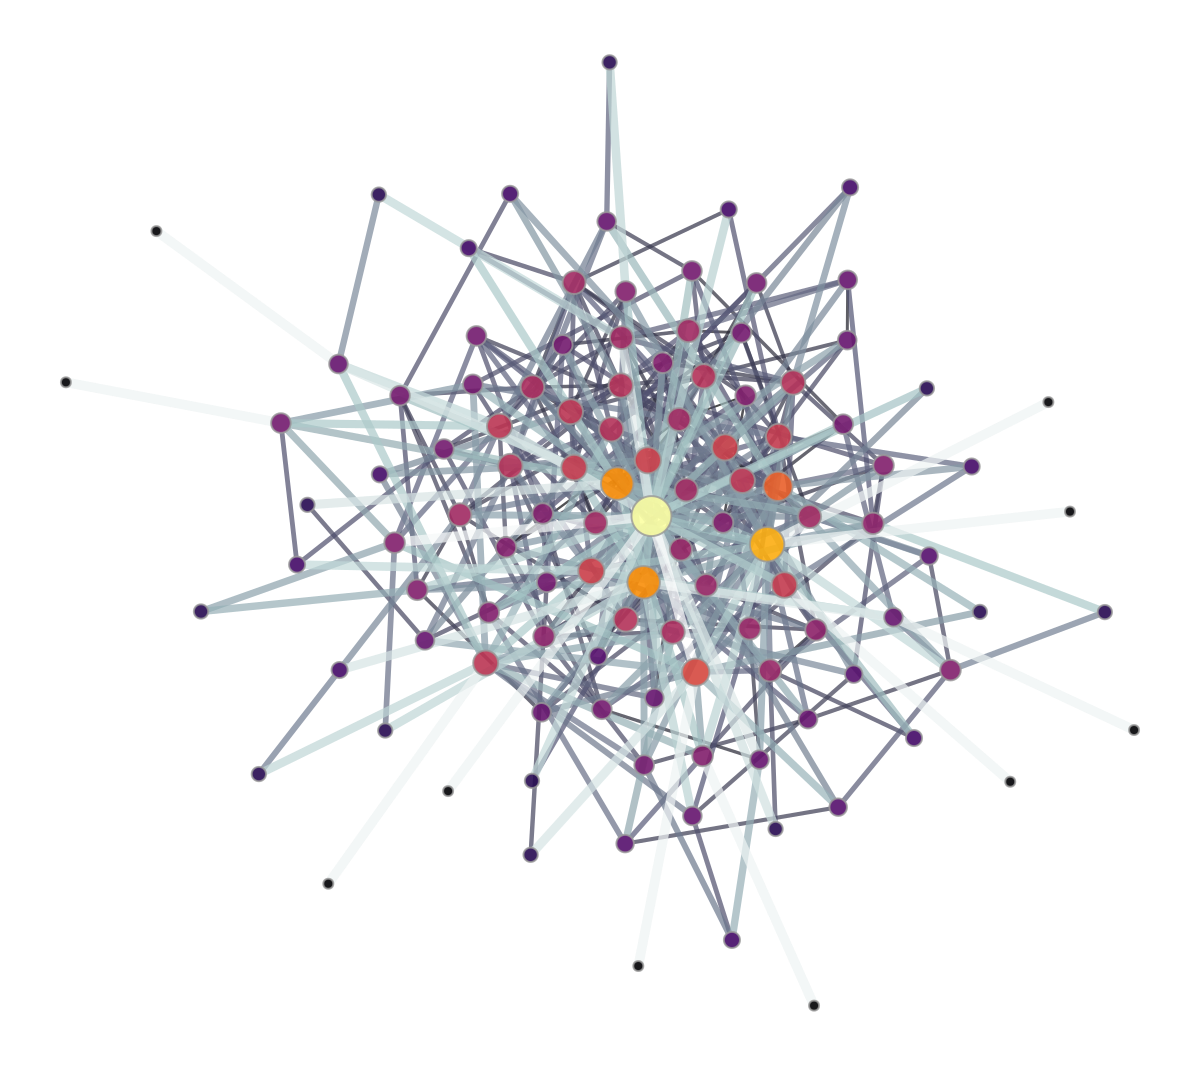

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e3207f4d0, at 0x7f0e2860c950>

In [14]:
deg = g.degree_property_map("total")
ebet = gt.betweenness(g)[1]   # edge betweeness
gt.graph_draw(g,
              vertex_size=gt.prop_to_size(deg,mi=5,ma=20,log=False),
              vertex_fill_color=gt.prop_to_size(deg,log=False),
              vcmap=(plt.cm.inferno, .9),
              vorder=deg,
              edge_color=gt.prop_to_size(ebet),
              eorder=ebet,
              edge_pen_width=gt.prop_to_size(ebet,mi=1,ma=5,log=False),
              ecmap=(plt.cm.bone, .7)
             )